### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [89]:
data = pd.read_csv('data/coupons.csv')

In [90]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration  gender    age    mar

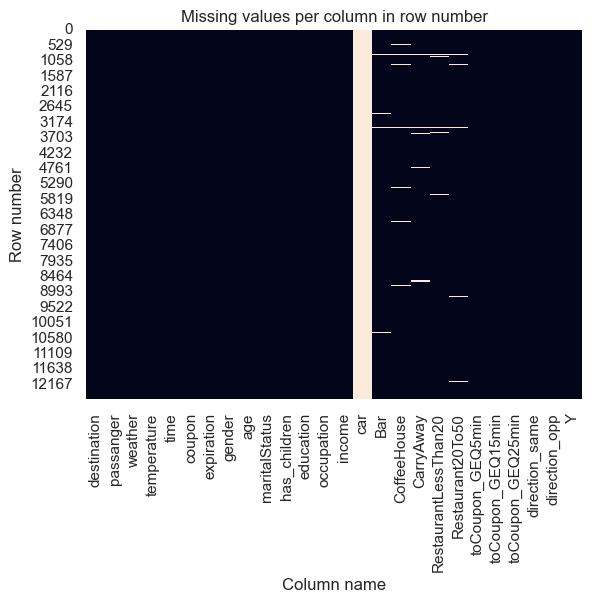

In [91]:
# pandas tweaks so we can see everything properly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# let's take a closer look by evaluating the summary stats for the dataframe
print(data.describe(include='all'))

# missing values (text-based)
print(data.isnull().sum())

# missing values (heatmap)
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing values per column in row number')
plt.xlabel('Column name')
plt.ylabel('Row number')
plt.show()

Findings
* car only has 108 non-null rows, other columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) have between 100-200 nulls
* remaining columns are always defined

Duplicates
* no duplicate concerns since we don't have identifiers or other fields to determine this 
* a completely duplicate row here is not necessarily an issue

Outliers
* a boxplot doesn't make sense here, based on summary stats, there is no need for range checking either

3. Decide what to do about your missing data -- drop, replace, other...

In [92]:
# based on the above analysis, let's drop the car column due to a large number of missing values
if 'car' in data.columns:
    data = data.drop('car', axis=1)

# for the other columns with null-values, it seems reasonable to replace nulls with never to improve data quality
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('never')

# let's also rename the 'Y' column to something more useful
data.rename(columns={'Y': 'didAcceptCoupon'}, inplace=True)

# make sure all looks good now
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
didAcceptCoupon         0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [93]:
coupon_acceptance_values = data['didAcceptCoupon'].value_counts()
coupon_acceptance_response_percentages = coupon_acceptance_values / coupon_acceptance_values.sum() * 100
print(coupon_acceptance_response_percentages)

didAcceptCoupon
1    56.843267
0    43.156733
Name: count, dtype: float64


Based on the above output, 56.84% of respondents chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

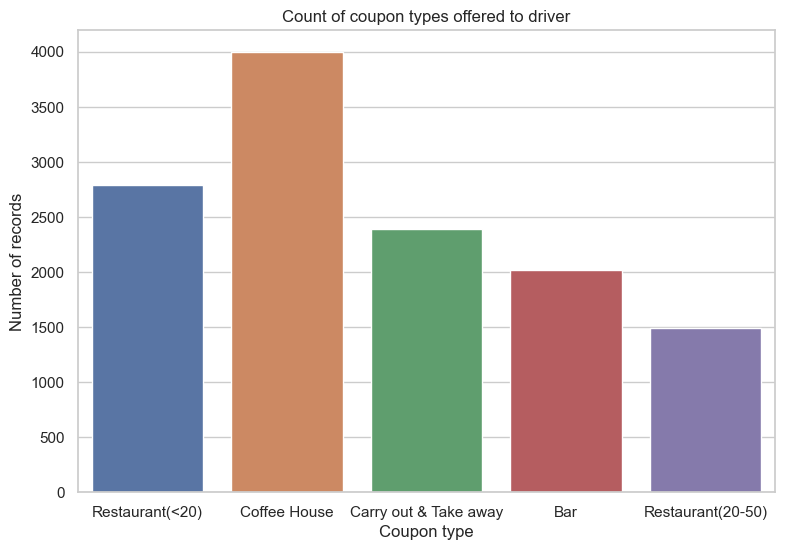

In [95]:
# the type of bar plot we want to use here is a countplot since coupon is non-numeric
plt.figure(figsize=(9,6))
sns.countplot(x='coupon', data=data)
plt.title('Count of coupon types offered to driver')
plt.xlabel('Coupon type')
plt.ylabel('Number of records')
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


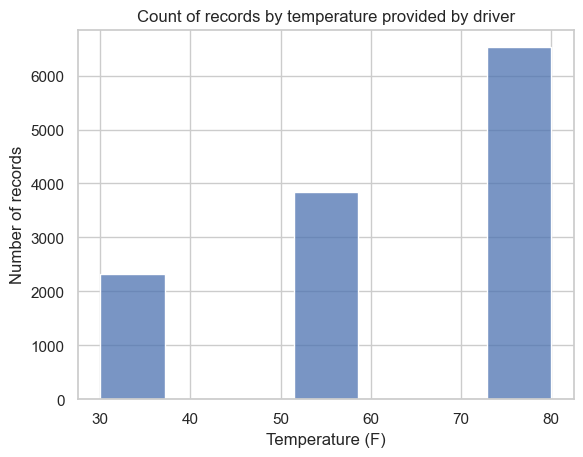

In [96]:
histogram = sns.histplot(data['temperature'], bins=7)
plt.title('Count of records by temperature provided by driver')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of records')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [97]:
bar_coupons_data = data[data['coupon'] == 'Bar'].reset_index(drop=True)
print(bar_coupons_data.head())

       destination  passanger weather  temperature  time coupon expiration  \
0  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
1             Home      Alone   Sunny           55   6PM    Bar         1d   
2             Work      Alone   Sunny           55   7AM    Bar         1d   
3  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
4             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age      maritalStatus  has_children                 education  \
0  Female  21  Unmarried partner             1  Some college - no degree   
1  Female  21  Unmarried partner             1  Some college - no degree   
2  Female  21  Unmarried partner             1  Some college - no degree   
3    Male  21             Single             0          Bachelors degree   
4    Male  21             Single             0          Bachelors degree   

                   occupation           income    Bar CoffeeHouse CarryAwa

2. What proportion of bar coupons were accepted?


In [98]:
bar_coupon_acceptance_values = bar_coupons_data['didAcceptCoupon'].value_counts()
bar_coupon_response_percentages = bar_coupon_acceptance_values / bar_coupon_acceptance_values.sum() * 100
print(bar_coupon_response_percentages)

didAcceptCoupon
0    58.998513
1    41.001487
Name: count, dtype: float64


Based on the above output, 41% of bar coupons were accepted by the driver

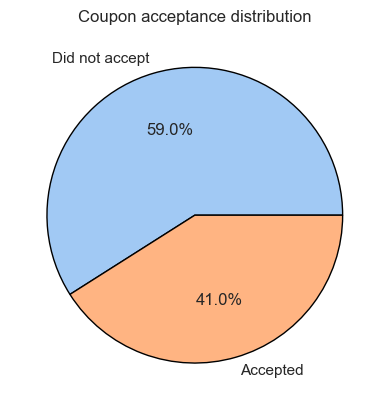

In [144]:
labels = [ 'Did not accept', 'Accepted' ]

plt.pie(bar_coupon_response_percentages, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Coupon acceptance distribution')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [100]:
# ignoring nulls since we don't actually know what the value would have been
bar3timesorless_filter = ['never', 'less1', '1~3']
bar3timesorless_acceptance_values = bar_coupons_data[bar_coupons_data['Bar'].isin(bar3timesorless_filter)]['didAcceptCoupon'].value_counts()
bar3timesorless_response_percentages = bar3timesorless_acceptance_values / bar3timesorless_acceptance_values.sum() * 100
print(bar3timesorless_response_percentages)

barmorethan3times_filter = ['4~8', 'gt8']
barmorethan3times_acceptance_values = bar_coupons_data[bar_coupons_data['Bar'].isin(barmorethan3times_filter)]['didAcceptCoupon'].value_counts()
barmorethan3times_response_percentages = barmorethan3times_acceptance_values / barmorethan3times_acceptance_values.sum() * 100
print(barmorethan3times_response_percentages)

didAcceptCoupon
0    62.926293
1    37.073707
Name: count, dtype: float64
didAcceptCoupon
1    76.884422
0    23.115578
Name: count, dtype: float64


Based on the above output, drivers who went to the bar 3 or fewer times a month accepted bar coupons 37.1% of the time, while those who went to the bar more accepted them 76.9% of the time, a rate that is 39.8% higher

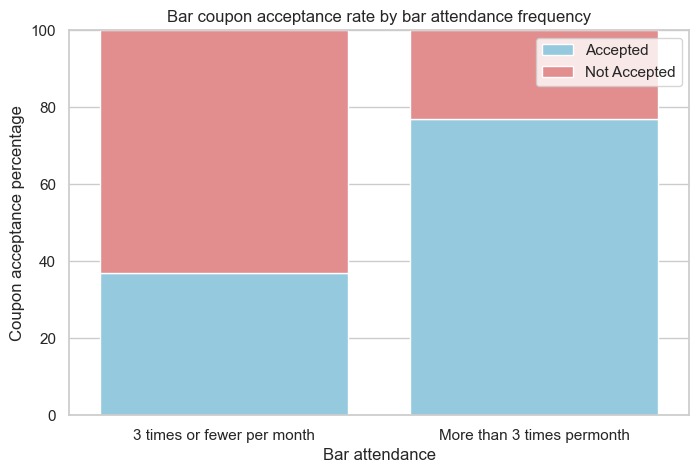

In [101]:
cohorts = [ '3 times or fewer per month', 'More than 3 times permonth' ]
accepted_percentages = [ bar3timesorless_response_percentages[1], barmorethan3times_response_percentages[1] ]
not_accepted_percentages = [ bar3timesorless_response_percentages[0], barmorethan3times_response_percentages[0] ]

thisData = pd.DataFrame({'Cohort': cohorts, 'Accepted': accepted_percentages, 'Not Accepted': not_accepted_percentages})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

sns.barplot(x='Cohort', y='Accepted', data=thisData, color='skyblue', label='Accepted')
sns.barplot(x='Cohort', y='Not Accepted', data=thisData, color='lightcoral', label='Not Accepted', bottom=accepted_percentages)

plt.ylim(0, 100)
plt.ylabel('Coupon acceptance percentage')
plt.xlabel('Bar attendance')
plt.title('Bar coupon acceptance rate by bar attendance frequency')
plt.legend()

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
# target drivers are those who go to the bar more than once a month and are over 25
morethanonceamonth_filter = ['1~3', '4~8', 'gt8']
# cannot convert age column to integers so we need filter for age too
over25age_filter = ['21', 'below21']

target_drivers = bar_coupons_data[(bar_coupons_data['Bar'].isin(morethanonceamonth_filter)) & (~bar_coupons_data['age'].isin(over25age_filter))]
# get the rest by negating and using OR
remaining_drivers = bar_coupons_data[(~bar_coupons_data['Bar'].isin(morethanonceamonth_filter)) | (bar_coupons_data['age'].isin(over25age_filter))]

targetdrivers_acceptance_values = target_drivers['didAcceptCoupon'].value_counts()
targetdrivers_response_percentages = targetdrivers_acceptance_values / targetdrivers_acceptance_values.sum() * 100
print(targetdrivers_response_percentages)

remainingdrivers_acceptance_values = remaining_drivers['didAcceptCoupon'].value_counts()
remainingdrivers_response_percentages = remainingdrivers_acceptance_values / remainingdrivers_acceptance_values.sum() * 100
print(remainingdrivers_response_percentages)

didAcceptCoupon
1    69.52381
0    30.47619
Name: count, dtype: float64
didAcceptCoupon
0    66.499687
1    33.500313
Name: count, dtype: float64


Based on the above output, drivers who are over 25 and report going to the bar more than once a month accepted bar coupons 69.5% of the time while all other drivers accepted bar coupons only 33.5% of the time, a rate that is 36% lower

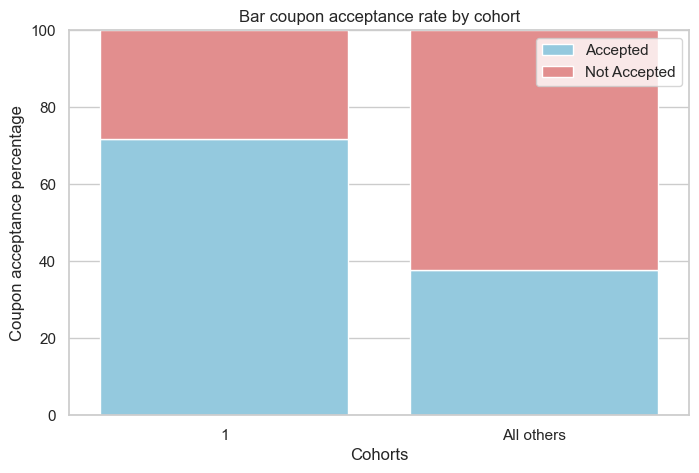

In [102]:
cohorts = [ '1', 'All others' ]
accepted_percentages = [ targetdrivers_response_percentages[1], remainingdrivers_response_percentages[1] ]
not_accepted_percentages = [ targetdrivers_response_percentages[0], remainingdrivers_response_percentages[0] ]

thisData = pd.DataFrame({'Cohort': cohorts, 'Accepted': accepted_percentages, 'Not Accepted': not_accepted_percentages})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

sns.barplot(x='Cohort', y='Accepted', data=thisData, color='skyblue', label='Accepted')
sns.barplot(x='Cohort', y='Not Accepted', data=thisData, color='lightcoral', label='Not Accepted', bottom=accepted_percentages)

plt.ylim(0, 100)
plt.ylabel('Coupon acceptance percentage')
plt.xlabel('Cohorts')
plt.title('Bar coupon acceptance rate by cohort')
plt.legend()

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [103]:
# compare coupon acceptance rate between:
# - drivers who go to bars more than once a month, had non-kid passengers and whose occupation was not 
#   farming, fishing or forestry
# - all other drivers

barmorethanonceamonth_filter = ['1~3', '4~8', 'gt8']
nonkidpassenger_filter = ['Friend(s)', 'Partner']
occupation_filter = ['Farming Fishing & Forestry']

target_drivers = bar_coupons_data[(bar_coupons_data['Bar'].isin(barmorethanonceamonth_filter)) & (bar_coupons_data['passanger'].isin(nonkidpassenger_filter)) & (~bar_coupons_data['occupation'].isin(occupation_filter))]
remaining_drivers = bar_coupons_data[(~bar_coupons_data['Bar'].isin(barmorethanonceamonth_filter)) | (~bar_coupons_data['passanger'].isin(nonkidpassenger_filter)) | (bar_coupons_data['occupation'].isin(occupation_filter))]

targetdrivers_acceptance_values = target_drivers['didAcceptCoupon'].value_counts()
targetdrivers_response_percentages = targetdrivers_acceptance_values / targetdrivers_acceptance_values.sum() * 100
print(targetdrivers_response_percentages)

remainingdrivers_acceptance_values = remaining_drivers['didAcceptCoupon'].value_counts()
remainingdrivers_response_percentages = remainingdrivers_acceptance_values / remainingdrivers_acceptance_values.sum() * 100
print(remainingdrivers_response_percentages)

didAcceptCoupon
1    71.794872
0    28.205128
Name: count, dtype: float64
didAcceptCoupon
0    62.294182
1    37.705818
Name: count, dtype: float64


Based on the above output, the target drivers accepted the bar coupon 71.8% of the time while all other drivers did so only 37.7% of the time, thus we have that the target drivers rate of bar coupon acceptance is 34.1% higher

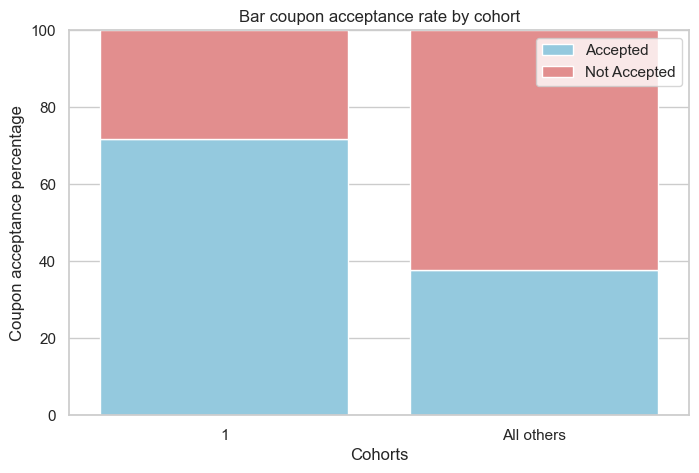

In [104]:
cohorts = [ '1', 'All others' ]
accepted_percentages = [ targetdrivers_response_percentages[1], remainingdrivers_response_percentages[1] ]
not_accepted_percentages = [ targetdrivers_response_percentages[0], remainingdrivers_response_percentages[0] ]

thisData = pd.DataFrame({'Cohort': cohorts, 'Accepted': accepted_percentages, 'Not Accepted': not_accepted_percentages})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

sns.barplot(x='Cohort', y='Accepted', data=thisData, color='skyblue', label='Accepted')
sns.barplot(x='Cohort', y='Not Accepted', data=thisData, color='lightcoral', label='Not Accepted', bottom=accepted_percentages)

plt.ylim(0, 100)
plt.ylabel('Coupon acceptance percentage')
plt.xlabel('Cohorts')
plt.title('Bar coupon acceptance rate by cohort')
plt.legend()

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [145]:
# compare acceptance between these 3 cohorts
cohort1_bar_filter = ['1~3', '4~8', 'gt8']
cohort1_passenger_filter = ['Friend(s)', 'Partner']
cohort1_marital_status = ['Widowed']

cohort2_bar_filter = ['1~3', '4~8', 'gt8']
cohort2_age_filter = ['21', '26', 'below21']

cohort3_restaurant_filter = ['4~8', 'gt8']
cohort3_income_filter = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']

cohort1_drivers = bar_coupons_data[(bar_coupons_data['Bar'].isin(cohort1_bar_filter)) & (bar_coupons_data['passanger'].isin(cohort1_passenger_filter)) & (~bar_coupons_data['maritalStatus'].isin(cohort1_marital_status))]
cohort1_acceptance_values = cohort1_drivers['didAcceptCoupon'].value_counts()
cohort1_response_percentages = cohort1_acceptance_values / cohort1_acceptance_values.sum() * 100
print(cohort1_response_percentages)

cohort2_drivers = bar_coupons_data[(bar_coupons_data['Bar'].isin(cohort2_bar_filter)) & (bar_coupons_data['age'].isin(cohort2_age_filter))]
cohort2_acceptance_values = cohort2_drivers['didAcceptCoupon'].value_counts()
cohort2_response_percentages = cohort2_acceptance_values / cohort2_acceptance_values.sum() * 100
print(cohort2_response_percentages)

cohort3_drivers = bar_coupons_data[(bar_coupons_data['RestaurantLessThan20'].isin(cohort3_restaurant_filter)) & (bar_coupons_data['income'].isin(cohort3_income_filter))]
cohort3_acceptance_values = cohort3_drivers['didAcceptCoupon'].value_counts()
cohort3_response_percentages = cohort3_acceptance_values / cohort3_acceptance_values.sum() * 100
print(cohort3_response_percentages)

didAcceptCoupon
1    71.794872
0    28.205128
Name: count, dtype: float64
didAcceptCoupon
1    72.173913
0    27.826087
Name: count, dtype: float64
didAcceptCoupon
0    54.651163
1    45.348837
Name: count, dtype: float64


Based on the above output, cohort 2 accepted bar coupons at the highest rate of 72.2% followed by cohort 1 at 71.8%. cohort 3 had the lowest bar coupon acceptance rate at 45.3%

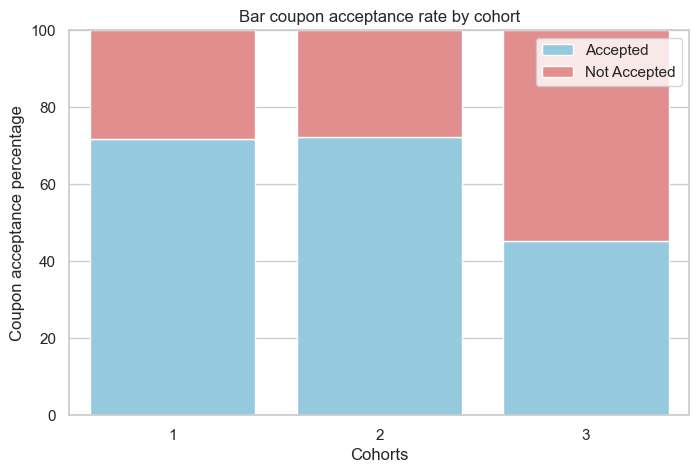

In [106]:
cohorts = [ '1', '2', '3' ]
accepted_percentages = [ cohort1_response_percentages[1], cohort2_response_percentages[1], cohort3_response_percentages[1] ]
not_accepted_percentages = [ cohort1_response_percentages[0], cohort2_response_percentages[0], cohort3_response_percentages[0] ]

thisData = pd.DataFrame({'Cohort': cohorts, 'Accepted': accepted_percentages, 'Not Accepted': not_accepted_percentages})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

sns.barplot(x='Cohort', y='Accepted', data=thisData, color='skyblue', label='Accepted')
sns.barplot(x='Cohort', y='Not Accepted', data=thisData, color='lightcoral', label='Not Accepted', bottom=accepted_percentages)

plt.ylim(0, 100)
plt.ylabel('Coupon acceptance percentage')
plt.xlabel('Cohorts')
plt.title('Bar coupon acceptance rate by cohort')
plt.legend()

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on all of these analyses, it is clear that there is a very strong correlation between how frequently a driver goes to the bar and how likely they are to accept the bar coupon being offered. none of the other properties evaluated in this section had a stronger positive correlation to coupon acceptance than than the monthly bar attendance frequency

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's consider the 'Coffee House' coupon group to determine the kind of driver that is most likely to accept this type of coupon overall, we have the following coffee house coupon acceptance rate across all driver characteristics

didAcceptCoupon
0    50.075075
1    49.924925
Name: count, dtype: float64


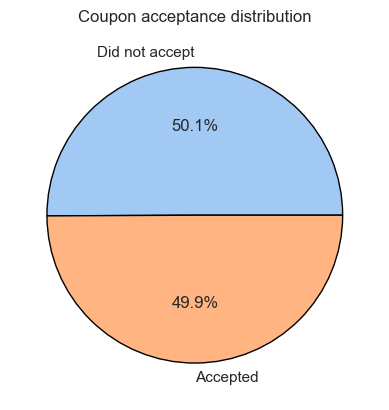

In [146]:
coffeehouse_coupons_data = data[data['coupon'] == 'Coffee House'].reset_index(drop=True)

coffeehouse_coupon_acceptance_values = coffeehouse_coupons_data['didAcceptCoupon'].value_counts()
coffeehouse_coupon_response_percentages = coffeehouse_coupon_acceptance_values / coffeehouse_coupon_acceptance_values.sum() * 100
print(coffeehouse_coupon_response_percentages)

# based on the above output, 49.9% of coffee house coupons were accepted by the driver

labels = [ 'Did not accept', 'Accepted' ]

plt.pie(coffeehouse_coupon_response_percentages, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Coupon acceptance distribution')
plt.show()

Given this even split, we should investigate to better understand other acceptance factors from what we know about the data, it would be interesting to dig deeper into how the following affect coffee house coupon acceptance rates

- is the driver already into coffee (CoffeHouse column frequency)
- where the driver is currently headed (destination)
- if the driver has a passenger with them (see if gifting is a factor)
- marital status (wants to socialize)
- time of day (needs energy)
- coupon expiration (fear of missing out)

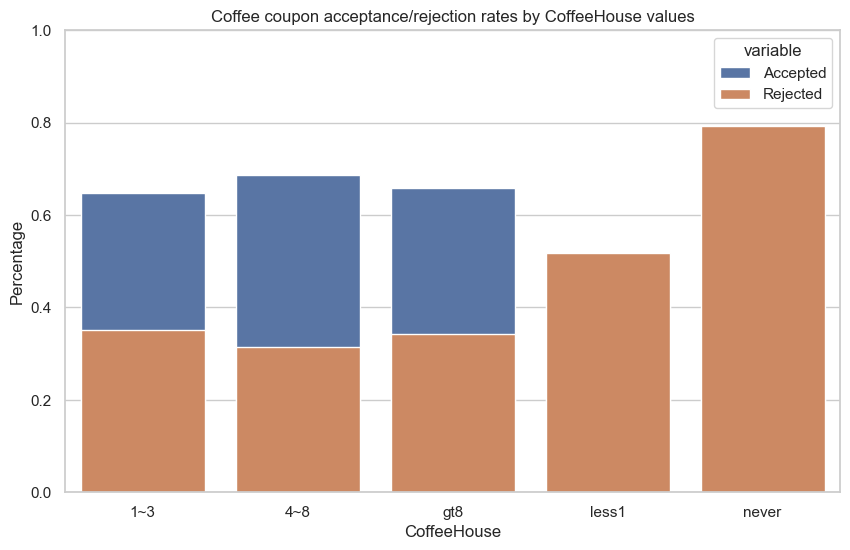

In [129]:
# since we are going to do this a lot, here is a function that will come in handy
# this function will generate a barplot of the acceptance/rejection rates of each unique value group for a given column
def plot_acceptance_by_column(dataFrame, columnName):
    acceptance = dataFrame.groupby(columnName)['didAcceptCoupon'].mean().reset_index()
    acceptance.columns = [columnName, 'Accepted']
    
    rejection = dataFrame.groupby(columnName)['didAcceptCoupon'].apply(lambda x: 1 - x.mean()).reset_index()
    rejection.columns = [columnName, 'Rejected']
    
    rates = pd.merge(acceptance, rejection, on=columnName)
    # https://pandas.pydata.org/docs/reference/api/pandas.melt.html
    rates_melted = pd.melt(rates, id_vars=[columnName], value_vars=['Accepted', 'Rejected'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=columnName, y='value', hue='variable', data=rates_melted, dodge=False)
    plt.title(f'Coffee coupon acceptance/rejection rates by {columnName} values')
    plt.ylabel('Percentage')
    plt.ylim(0, 1)
    plt.show()

# let's take a look at how coffee drinking frequency (CoffeeHouse) impacts acceptance first
plot_acceptance_by_column(coffeehouse_coupons_data, 'CoffeeHouse')

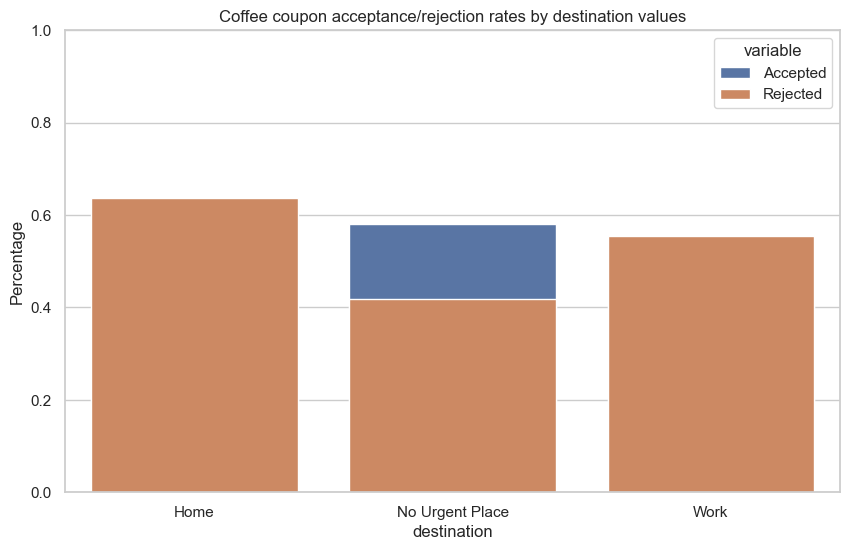

In [130]:
# as we can see in the barplot, the number of times the driver goes to a cafe has a strong positive correlation
# with their coffee coupon acceptance rate

# now let's look at destination
plot_acceptance_by_column(coffeehouse_coupons_data, 'destination')

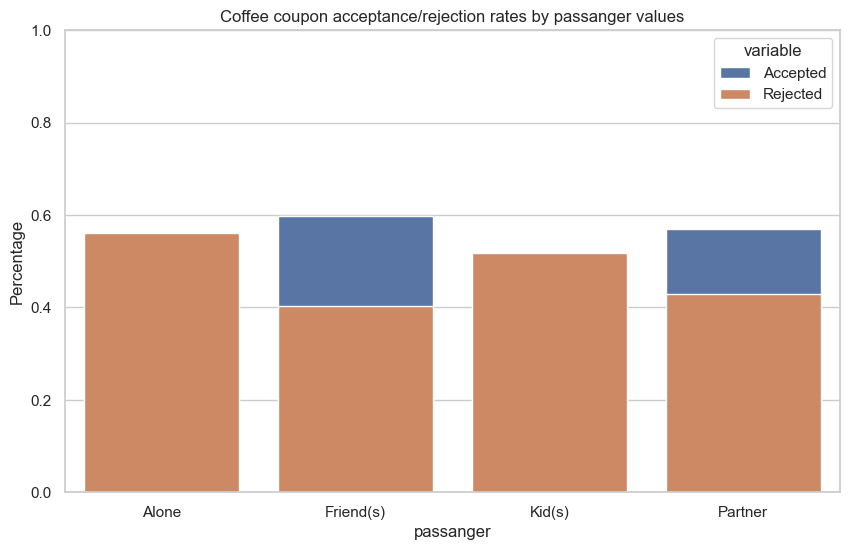

In [131]:
# it looks like drivers with no urgent destination after their delivery are much more likely to accept 
# coffee coupons, which makes sense. next we want to determine if who they're riding with makes a 
# difference so let's consider the passenger column
plot_acceptance_by_column(coffeehouse_coupons_data, 'passanger')

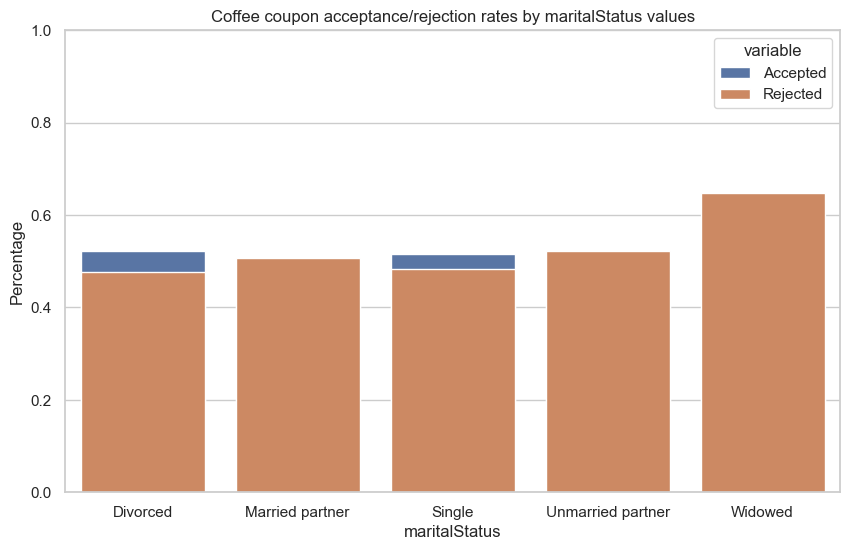

In [132]:
# we can see that drivers who are riding with a friend or partner are much more likely to accept the coupon
# now let's see how marital status impacts acceptance
plot_acceptance_by_column(coffeehouse_coupons_data, 'maritalStatus')

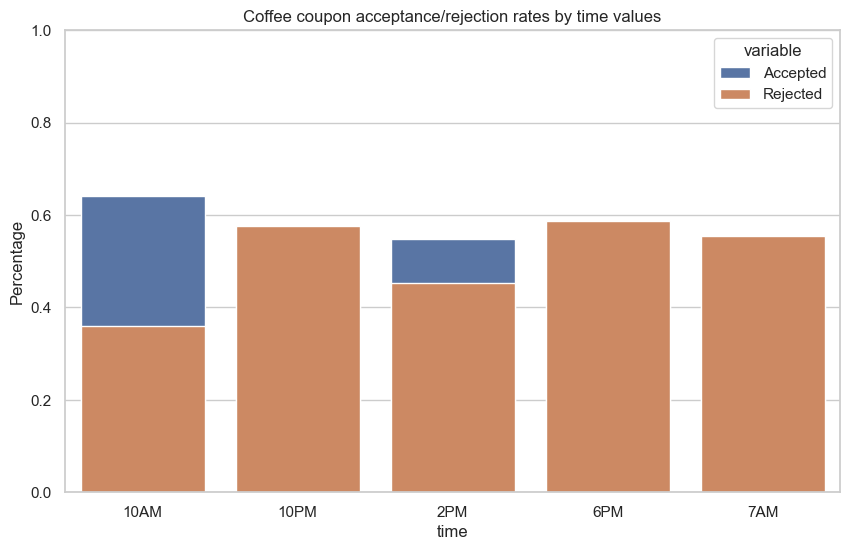

In [133]:
# as expected, divorced and single drivers are more likely to accept coffee coupons
# humans tend to consume coffee at specific times of day so let's now consider this column
plot_acceptance_by_column(coffeehouse_coupons_data, 'time')

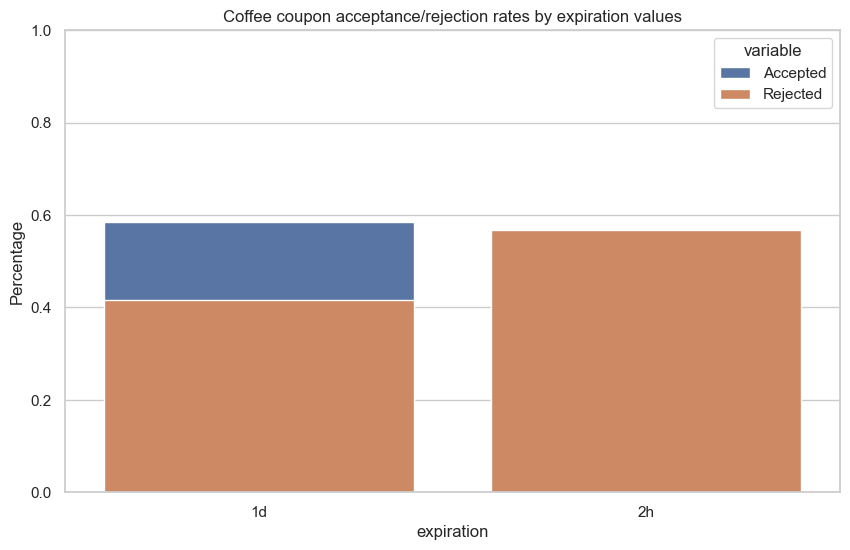

In [134]:
# it looks like later in the morning and early afternoon are the times when drivers are most likely to accept these
# coffee coupons, which also makes sense. finally, let's take a look at coupon expiration

plot_acceptance_by_column(coffeehouse_coupons_data, 'expiration')

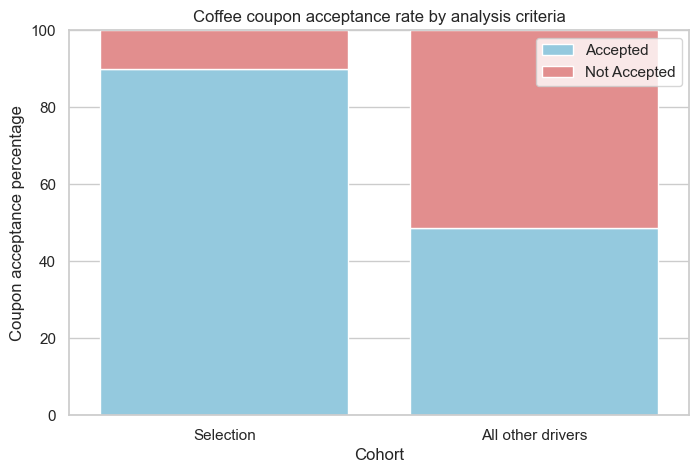

didAcceptCoupon
1    89.830508
0    10.169492
Name: count, dtype: float64
didAcceptCoupon
0    51.289324
1    48.710676
Name: count, dtype: float64


In [143]:
# in this case, drivers who were given a coupon that expired within 24 hours were much more likely to accept it
# than those who received a coupon that expired basically immediately in the next 2 hours

# based on these findings, we now create a cohort and compare it to the rest of the data
# to see how much more likely these drivers are to accept a coffee coupon 
target_drivers = coffeehouse_coupons_data[(coffeehouse_coupons_data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & 
                                          (coffeehouse_coupons_data['destination'].isin(['No Urgent Place'])) & 
                                          (coffeehouse_coupons_data['passanger'].isin(['Friend(s)', 'Partner'])) & 
                                          (coffeehouse_coupons_data['maritalStatus'].isin(['Divorced', 'Single'])) &
                                         (coffeehouse_coupons_data['time'].isin(['10AM', '2PM'])) &
                                         (coffeehouse_coupons_data['expiration'].isin(['1d']))]
target_drivers_acceptance_values = target_drivers['didAcceptCoupon'].value_counts()
target_drivers_response_percentages = target_drivers_acceptance_values / target_drivers_acceptance_values.sum() * 100

# now compute all other drivers for reference
all_other_drivers = coffeehouse_coupons_data[(~coffeehouse_coupons_data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) | 
                                          (~coffeehouse_coupons_data['destination'].isin(['No Urgent Place'])) | 
                                          (~coffeehouse_coupons_data['passanger'].isin(['Friend(s)', 'Partner'])) | 
                                          (~coffeehouse_coupons_data['maritalStatus'].isin(['Divorced', 'Single'])) |
                                         (~coffeehouse_coupons_data['time'].isin(['10AM', '2PM'])) |
                                         (~coffeehouse_coupons_data['expiration'].isin(['1d']))]
all_other_drivers_acceptance_values = all_other_drivers['didAcceptCoupon'].value_counts()
all_other_drivers_response_percentages = all_other_drivers_acceptance_values / all_other_drivers_acceptance_values.sum() * 100

# and plot

cohorts = [ 'Selection', 'All other drivers' ]
accepted_percentages = [ target_drivers_response_percentages[1], all_other_drivers_response_percentages[1] ]
not_accepted_percentages = [ target_drivers_response_percentages[0], all_other_drivers_response_percentages[0] ]

thisData = pd.DataFrame({'Cohort': cohorts, 'Accepted': accepted_percentages, 'Not Accepted': not_accepted_percentages})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

sns.barplot(x='Cohort', y='Accepted', data=thisData, color='skyblue', label='Accepted')
sns.barplot(x='Cohort', y='Not Accepted', data=thisData, color='lightcoral', label='Not Accepted', bottom=accepted_percentages)

plt.ylim(0, 100)
plt.ylabel('Coupon acceptance percentage')
plt.xlabel('Cohort')
plt.title('Coffee coupon acceptance rate by analysis criteria')
plt.legend()

plt.show()

print(target_drivers_response_percentages)
print(all_other_drivers_response_percentages)

Based on the above analysis, we are able to conclude that the following criteria

- driver goes to cafés at least once a month
- driver has nowhere urgent or specific to be after their delivery
- driver has a friend or partner as passenger
- driver is single or divorced
- driving time is 10AM or 2PM
- coupon expiration is 1 day

result in a coffee coupon acceptance rate of 89.8% which is 38.5% higher than all the other drivers therefore we can confidently say that these are the characteristics of the data for drivers who most commonly accept this type of coupon

As a next step, we should perform a similar analysis for other coupon types in order to compare our findings to what we've found about the bar and coffee coupons. 

I recommend that more functions be created in order to improve the quality of our analysis by making it safer to reuse code while having an easier time making global changes.